In [10]:
import random
import time
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import heapq

In [11]:
def generate_random_digraph(N, max_edges_per_vertex, edge_probability=0.3, weight_range=(1, 10)):
    """
    Generates a random weighted directed graph with N vertices, ensuring that no vertex has more than max_edges_per_vertex edges.
    
    :param N: Number of vertices
    :param max_edges_per_vertex: Maximum number of outgoing edges per vertex
    :param edge_probability: Probability of an edge existing between two nodes
    :param weight_range: Tuple representing the range of edge weights (min, max)
    :return: A NetworkX directed graph
    """
    G = nx.DiGraph()
    G.add_nodes_from(range(N))
    
    for i in range(N):
        possible_targets = list(set(range(N)) - {i})  # Exclude self-loops
        random.shuffle(possible_targets)
        num_edges = min(max_edges_per_vertex, len(possible_targets))  # Limit max edges per vertex
        
        for j in possible_targets[:num_edges]:
            if random.random() < edge_probability:
                weight = random.randint(*weight_range)
                G.add_edge(i, j, weight=weight)
    
    return G

def draw_graph(G):
    """Draws the directed weighted graph."""
    pos = nx.spring_layout(G)
    edge_labels = {(u, v): G[u][v]['weight'] for u, v in G.edges}
    
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, edge_color='gray', arrowsize=20)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

def export_to_excel(G, N):
    """Exports the graph's edges and weights to an Excel file named after the number of vertices."""
    filename = f"graph_{N}.xlsx"
    df = pd.DataFrame([(u, v, G[u][v]['weight']) for u, v in G.edges], columns=["Source", "Target", "Weight"])
    df.to_excel(filename, index=False)
    print(f"Graph exported to {filename}")

def dijkstra_shortest_path(G, source, target):
    """Finds the shortest path between source and target using Dijkstra's algorithm."""
    try:
        path = nx.shortest_path(G, source=source, target=target, weight='weight', method='dijkstra')
        path_length = nx.shortest_path_length(G, source=source, target=target, weight='weight', method='dijkstra')
        print(f"Shortest path from {source} to {target}: {path} with total weight {path_length}")
        return path, path_length
    except nx.NetworkXNoPath:
        print(f"No path found from {source} to {target}.")
        return None, None
def dijkstra_shortest_path(G, source, target):
    """Finds the shortest path between source and target using Dijkstra's algorithm."""
    try:
        path = nx.shortest_path(G, source=source, target=target, weight='weight', method='dijkstra')
        path_length = nx.shortest_path_length(G, source=source, target=target, weight='weight', method='dijkstra')
        print(f"Shortest path from {source} to {target}: {path} with total weight {path_length}")
        return path, path_length
    except nx.NetworkXNoPath:
        print(f"No path found from {source} to {target}.")
        return None, None

def euclidean_distance_heuristic(G, pos, node, target):
    """
    Calculates the Euclidean distance between two nodes based on their positions.
    This serves as a heuristic for A* algorithm.
    """
    return math.sqrt((pos[node][0] - pos[target][0])**2 + (pos[node][1] - pos[target][1])**2)

def a_star_shortest_path(G, source, target):
    """
    Finds the shortest path between source and target using A* algorithm.
    Uses a simple Euclidean distance heuristic based on node positions.
    """
    # Generate positions for all nodes (for heuristic calculation)
    pos = nx.spring_layout(G, seed=42)  # seed for reproducibility
    
    # Priority queue for nodes to explore
    open_set = [(0, source, [source])]  # (f_score, node, path)
    heapq.heapify(open_set)
    
    # Closed set to keep track of visited nodes
    closed_set = set()
    
    # Cost from start to node
    g_score = {node: float('infinity') for node in G.nodes()}
    g_score[source] = 0
    
    while open_set:
        f_score, current, path = heapq.heappop(open_set)
        
        if current == target:
            # Calculate total path weight
            path_length = sum(G[path[i]][path[i+1]]['weight'] for i in range(len(path)-1))
            print(f"A* found path from {source} to {target}: {path} with total weight {path_length}")
            return path, path_length
        
        if current in closed_set:
            continue
            
        closed_set.add(current)
        
        for neighbor in G.successors(current):
            if neighbor in closed_set:
                continue
                
            tentative_g_score = g_score[current] + G[current][neighbor]['weight']
            
            if tentative_g_score < g_score[neighbor]:
                g_score[neighbor] = tentative_g_score
                new_path = path + [neighbor]
                
                # Calculate f_score = g_score + heuristic
                h_score = euclidean_distance_heuristic(G, pos, neighbor, target)
                f_score = tentative_g_score + h_score
                
                heapq.heappush(open_set, (f_score, neighbor, new_path))
    
    print(f"No path found from {source} to {target}.")
    return None, None

def highlight_path_in_graph(G, path):
    """Draw the graph with the shortest path highlighted in red."""
    if not path:
        draw_graph(G)
        return
        
    pos = nx.spring_layout(G)
    edge_labels = {(u, v): G[u][v]['weight'] for u, v in G.edges}
    
    # Draw the graph with all edges in gray
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, edge_color='gray', arrowsize=20)
    
    # Create a list of edges in the path
    path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    
    # Draw the path edges in red
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2.0, arrowsize=20)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    plt.title(f"Path: {' -> '.join(str(node) for node in path)}")
    plt.show()


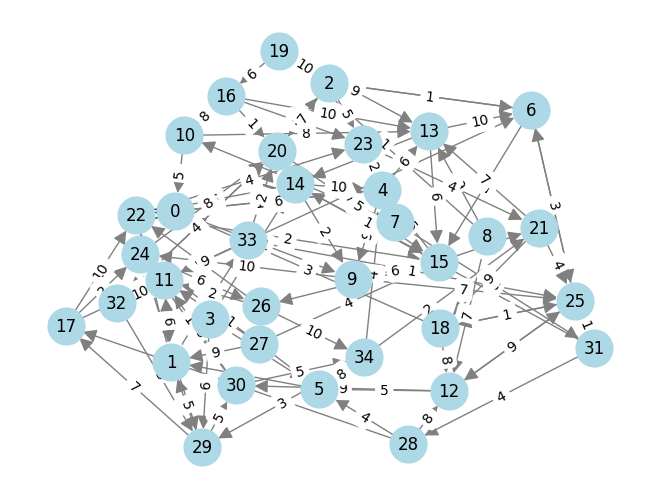

In [6]:
if __name__ == "__main__":
    N = int(input("Enter the number of vertices: "))
    max_edges_per_vertex = int(input("Enter the maximum number of edges per vertex: "))
    edge_probability = float(input("Enter the probability of edge creation (0-1): "))
    G = generate_random_digraph(N, max_edges_per_vertex, edge_probability)
    draw_graph(G)


In [ ]:
export_to_excel(G, N)


Graph exported to graph_15000.xlsx


In [7]:

source = int(input("Enter the source vertex for Dijkstra's algorithm: "))
target = int(input("Enter the target vertex for Dijkstra's algorithm: "))



In [ ]:
start_time = time.perf_counter()

# Code to be timed
path, path_length = a_star_shortest_path(G, source, target)
if path:
        highlight_path_in_graph(G, path)
result = 1
for i in range(1, 100001):
    result *= i

end_time = time.perf_counter()
execution_time = end_time - start_time

print(f"Execution time: {execution_time} seconds")

Shortest path from 1 to 31: [1, 22, 23, 7, 31] with total weight 19
Execution time: 2.1870392999990145 seconds


In [ ]:
start_time = time.perf_counter()

# Code to be timed
path, path_length = dijkstra_shortest_path(G, source, target)
if path:
        highlight_path_in_graph(G, path)
result = 1
for i in range(1, 100001):
    result *= i

end_time = time.perf_counter()
execution_time = end_time - start_time

print(f"Execution time: {execution_time} seconds")